In [3]:
import os
import math
import copy

import numpy as np
import pandas as pd
import platereadertools as prt

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib import rc

In [4]:
wd = '../Data/Plate Reader Experiments/'
data0mM_fps = [os.path.join(wd, fp) for fp in ['p2x11_80memberlibrary0mMIPTG20230718.txt','p2x11_80memberlibrary_0mMIPTG20230725.txt', 'p2x11_80memberlib_1mMIPTG20230730.txt']]
data1mM_fps = [os.path.join(wd, fp) for fp in ['p2x11_80memberlibrary_1mMIPTG20230718.txt','p2x11_80memberlibrary_1mMIPTG20230725.txt', 'p2x11_80memberlibrary_0mMIPTG20230730.txt']]
data10mM_fps = [os.path.join(wd, fp) for fp in ['p2x11_80memberlibrary_10mMIPTG20230718.txt','p2x11_80memberlibrary_10mMIPTG20230725.txt', 'p2x11_80memberlib_10mMIPTG20230730.txt']]

In [5]:
data0mM_l = [prt.Organize(data_fp, 8, 12, 18, 3/60) for data_fp in data0mM_fps]
data1mM_l = [prt.Organize(data_fp, 8, 12, 18, 3/60) for data_fp in data1mM_fps]
data10mM_l = [prt.Organize(data_fp, 8, 12, 18, 3/60) for data_fp in data10mM_fps]

In [6]:
reads = list(data0mM_l[0][0].keys())

In [7]:
reads

['600', 'GFP75:480,510']

In [8]:
data0mM = {}
time0mM = {}
data1mM = {}
time1mM = {}
data10mM = {}
time10mM = {}

SEM = True

if SEM:
        n = 3
else:
        n=1

for read in reads:
        
        # Calculate Means
        data0mM[read] = (data0mM_l[0][0][read]+data0mM_l[1][0][read]+data0mM_l[2][0][read])/3
        time0mM[read] = (data0mM_l[0][1][read]+data0mM_l[1][1][read]+data0mM_l[2][1][read])/3
        data1mM[read] = (data1mM_l[0][0][read]+data1mM_l[1][0][read]+data1mM_l[2][0][read])/3
        time1mM[read] = (data1mM_l[0][1][read]+data1mM_l[1][1][read]+data1mM_l[2][1][read])/3
        data10mM[read] = (data10mM_l[0][0][read]+data10mM_l[1][0][read]+data10mM_l[2][0][read])/3
        time10mM[read] = (data10mM_l[0][1][read]+data10mM_l[1][1][read]+data10mM_l[2][1][read])/3
        
        # Calculate Standard Deviation
        data0mM[read+'_std'] = ((((data0mM_l[0][0][read]-data0mM[read])**2+(data0mM_l[1][0][read]-data0mM[read])**2+(data0mM_l[2][0][read]-data0mM[read])**2)/3)**(1/2))
        time0mM[read+'_std'] = ((((data0mM_l[0][1][read]-time0mM[read])**2+(data0mM_l[1][1][read]-time0mM[read])**2+(data0mM_l[2][1][read]-time0mM[read])**2)/3)**(1/2))
        data1mM[read+'_std'] = ((((data1mM_l[0][0][read]-data1mM[read])**2+(data1mM_l[1][0][read]-data1mM[read])**2+(data1mM_l[2][0][read]-data1mM[read])**2)/3)**(1/2))
        time1mM[read+'_std'] = ((((data1mM_l[0][1][read]-time1mM[read])**2+(data1mM_l[1][1][read]-time1mM[read])**2+(data1mM_l[2][1][read]-time1mM[read])**2)/3)**(1/2))
        data10mM[read+'_std'] = ((((data10mM_l[0][0][read]-data10mM[read])**2+(data10mM_l[1][0][read]-data10mM[read])**2+(data10mM_l[2][0][read]-data10mM[read])**2)/3)**(1/2))
        time10mM[read+'_std'] = ((((data10mM_l[0][1][read]-time10mM[read])**2+(data10mM_l[1][1][read]-time10mM[read])**2+(data10mM_l[2][1][read]-time10mM[read])**2)/3)**(1/2))
        
        # Calculate Standard Error of the Means. This is because we are sampling from a distribution of means and becuase we are interested in seeing the std.deviation of the mean.
        data0mM[read+'_sem'] = ((((data0mM_l[0][0][read]-data0mM[read])**2+(data0mM_l[1][0][read]-data0mM[read])**2+(data0mM_l[2][0][read]-data0mM[read])**2)/3)**(1/2))/(n**(1/2))/n**(1/2)
        time0mM[read+'_sem'] = ((((data0mM_l[0][1][read]-time0mM[read])**2+(data0mM_l[1][1][read]-time0mM[read])**2+(data0mM_l[2][1][read]-time0mM[read])**2)/3)**(1/2))/(n**(1/2))/n**(1/2)
        data1mM[read+'_sem'] = ((((data1mM_l[0][0][read]-data1mM[read])**2+(data1mM_l[1][0][read]-data1mM[read])**2+(data1mM_l[2][0][read]-data1mM[read])**2)/3)**(1/2))/(n**(1/2))/n**(1/2)
        time1mM[read+'_sem'] = ((((data1mM_l[0][1][read]-time1mM[read])**2+(data1mM_l[1][1][read]-time1mM[read])**2+(data1mM_l[2][1][read]-time1mM[read])**2)/3)**(1/2))/(n**(1/2))/n**(1/2)
        data10mM[read+'_sem'] = ((((data10mM_l[0][0][read]-data10mM[read])**2+(data10mM_l[1][0][read]-data10mM[read])**2+(data10mM_l[2][0][read]-data10mM[read])**2)/3)**(1/2))/(n**(1/2))/n**(1/2)
        time10mM[read+'_sem'] = ((((data10mM_l[0][1][read]-time10mM[read])**2+(data10mM_l[1][1][read]-time10mM[read])**2+(data10mM_l[2][1][read]-time10mM[read])**2)/3)**(1/2))/(n**(1/2))/n**(1/2)
        
groups = [data0mM, data1mM, data10mM]
times = [time0mM, time1mM, time0mM]

In [9]:
def well_curves(data:dict, time:dict, read:str, size=(20, 15), s=10, error=None)->None:
    """
    Generates a figure where each suplots shows the read curve (designated by read) of each well.

    Args:
        data (dict): Keys are the read titles and values are the 3D data arrays.
        time (dict): Keys are the read titles and values are 1D arrays of the timepoints in hours.
        read (str): A list of strings which designates the reads of interest.
        size (tuple, optional): Matlab figure size. Defaults to (20, 15).
        s (int, optional): Scatter plot marker size. Defaults to 10.
    """
    fig, axs = plt.subplots(data[read].shape[0], data[read].shape[1], figsize=size, sharey=True, sharex=True)
    if error == 'x': 
        for i in range(data[read].shape[0]):
            for j in range(data[read].shape[1]):
                axs[i,j].errorbar(time[read],data[read][i,j,:], xerr=time[read+'_sem'], errorevery=20)
    elif error == 'y':
        for i in range(data[read].shape[0]):
            for j in range(data[read].shape[1]):
                axs[i,j].errorbar(time[read],data[read][i,j,:], yerr=data[read+'_sem'][i,j,:], errorevery=20)
    elif error == 'xy':
         for i in range(data[read].shape[0]):
            for j in range(data[read].shape[1]):
                axs[i,j].errorbar(time[read],data[read][i,j,:], xerr=time[read+'_sem'], yerr=data[read+'_sem'][i,j,:], errorevery=20)       
    else:
        for i in range(data[read].shape[0]):
            for j in range(data[read].shape[1]):
                axs[i,j].sactter(time[read],data[read][i,j,:],s=s)
        
    fig.suptitle(read, size=24)
    fig.supxlabel('Time [Hr.]', size=24)
    plt.tight_layout()

In [10]:
if False:
    for data, time in zip(groups, times):
        for read in reads:
            well_curves(data, time, read, error='xy')   

In [11]:
# Make every well that is not a valid blank (H5,H6,H7,H8,H11 or ((7,4), (7,5), (7,6), (7,7), (7,10))) to NaN.
for data in groups:
    for read in reads:
        data[read][7,4:8] = np.nan
        data[read][7,10] = np.nan

In [12]:
if False:
    for data, time in zip(groups, times):
        for read in reads:
            well_curves(data, time, read, error='xy')  

In [13]:
def blank(group_names:list, groups:list, blanks:list, reads:list)->dict:
    """
    Blanks the data in goups by suptracting the data in blanks for everytime point.

    Args:
        group_names (list): A list of strings characterizing each of the experimental groups.
        groups (list): A list of dictionaries which contain the read data for each experimental group. The keys are the read type and the values are 3 dimentional numpy arrays of the data.
        blanks (list): A list of dictionaries which contain the read data for each blank group. The nth dictionary contains the read type(key) and data(value) which will be applied to the nth experimental group in groups.
        reads (list): A list of strings which designates the reads of interest.

    Returns:
        dict: The keys are a strings designating the group type and the values are dictionaries containing the blanked data for each read and the error.
    """
    blank_data = {}
    for i, name in enumerate(group_names):
        blank_data[name] = {}
        g = groups[i]
        b = blanks[i]
        for read in reads:
            blank_data[name].update({read: g[read]-b[read]})
            blank_data[name].update({read+'_sem': np.sqrt(np.square(g[read+'_sem'])+np.square(b[read+'_sem']))})
            blank_data[name].update({read+'_std': np.sqrt(np.square(g[read+'_std'])+np.square(b[read+'_std']))})                                  
    return blank_data 

In [14]:
blanks = []
for i, group in enumerate(groups):
    blanks.append({})
    for read in reads:
        blanks[i][read] = np.ones(group[read].shape)*np.mean(data[read][7,(8,9,11)])
        blanks[i][read+'_sem'] = np.ones(group[read].shape)*np.std(data[read][7,(8,9,11)])
        blanks[i][read+'_std'] = np.ones(group[read].shape)*np.std(data[read][7,(8,9,11)])
 
blanked_data_l = blank(['0mM', '1mM', '10mM'], groups, blanks, reads)   
for group in ['0mM', '1mM', '10mM']:
    for read in reads:
        blanked_data_l[group][read][blanked_data_l[group][read]<0] = 0    

In [15]:
if False:
    for data, time in zip(blanked_data_l.values(), [time0mM, time1mM, time10mM]):
        for read in reads:
            well_curves(data, time, read, error='xy') 

In [16]:
def normalize(group_names:list, groups:list, reads:list, off_set=0.1)->dict:
    """
    Blanks the data by dividing the reads (excluding the OD600 read) by the OD600 data plus an offset (should be the starting OD).

    Args:
        group_names (list): A list of strings characterizing each of the experimental groups.
        groups (list): A list of dictionaries which contain the read data for each experimental group. The keys are the read type and the values are 3 dimentional numpy arrays of the data.
        reads (list): A list of strings which designates the reads of interest.
        off_set (float, optional): The offest in the denomenator of the equation y = read/(off_set+OD600). Defaults to 0.1.

    Returns:
        dict: The keys are a strings designating the group type and the values are dictionaries containing the normalize data for each read as well as the error.
    """
    norm_data = {}
    for i, name in enumerate(group_names):
        norm_data[name] = {}
        g = groups[i]
        if '_sem' not in name or '_std' not in name:
            norm_data[name].update({read[:3]+'_Normalized': g[read]/(off_set+g['600']) for read in reads if read != '600'})
            norm_data[name].update({'600'+'_Normalized': g['600']})
            norm_data[name].update({read[:3]+'_Normalized'+'_sem': norm_data[name][read[:3]+'_Normalized']*np.sqrt(np.square(g[read+'_sem']/(off_set+g[read]))+np.square(g['600_sem']/(off_set+g['600']))) for read in reads if read != '600'})
            norm_data[name]['600'+'_Normalized'+'_sem'] = g['600_sem']
            norm_data[name].update({read[:3]+'_Normalized'+'_std': norm_data[name][read[:3]+'_Normalized']*np.sqrt(np.square(g[read+'_std']/(off_set+g[read]))+np.square(g['600_std']/(off_set+g['600']))) for read in reads if read != '600'})
            norm_data[name]['600'+'_Normalized'+'_std'] = g['600_std']
    return norm_data

In [17]:
times[0].keys()

dict_keys(['600', '600_std', '600_sem', 'GFP75:480,510', 'GFP75:480,510_std', 'GFP75:480,510_sem'])

In [18]:
norm_data_l = normalize(list(blanked_data_l.keys()), list(blanked_data_l.values()), reads, off_set= 0.01)

In [19]:
times_normalized = {}
for i, (time, group) in enumerate(zip(times, norm_data_l.keys())):
    times_normalized[group] = {}
    for j, read in enumerate(time.keys()):
        if '_sem' in read:
            times_normalized[group][read[:3]+'_Normalized_sem'] = times[i][read]
            times_normalized[group][read[:3]+'_Normalized_sem'][times_normalized[group][read[:3]+'_Normalized_sem']<0] = 0
        elif '_std' in read:
            times_normalized[group][read[:3]+'_Normalized_std'] = times[i][read]
            times_normalized[group][read[:3]+'_Normalized_std'][times_normalized[group][read[:3]+'_Normalized_std']<0] = 0 
        else:
            times_normalized[group][read[:3]+'_Normalized'] = times[i][read]

In [20]:

for key in blanked_data_l.keys():
    for read in blanked_data_l['0mM'].keys():
        norm_data_l[key][read[:3]+'_Normalized'][norm_data_l[key][read[:3]+'_Normalized']<0] = 0
        times_normalized[key][read[:3]+'_Normalized'][times_normalized[key][read[:3]+'_Normalized']<0] = 0

In [21]:
def well_curves(data:dict, time:dict, read:str, size=(20, 15), s=10, error=None, error_type='_sem')->None:
    """
    Generates a figure where each suplots shows the read curve (designated by read) of each well.

    Args:
        data (dict): Keys are the read titles and values are the 3D data arrays.
        time (dict): Keys are the read titles and values are 1D arrays of the timepoints in hours.
        read (str): A list of strings which designates the reads of interest.
        size (tuple, optional): Matlab figure size. Defaults to (20, 15).
        s (int, optional): Scatter plot marker size. Defaults to 10.
    """
    fig, axs = plt.subplots(data[read].shape[0], data[read].shape[1], figsize=size, sharey=True, sharex=True)
    if error == 'x': 
        for i in range(data[read].shape[0]):
            for j in range(data[read].shape[1]):
                axs[i,j].errorbar(time[read],data[read][i,j,:], xerr=time[read+error_type], errorevery=20)
    elif error == 'y':
        for i in range(data[read].shape[0]):
            for j in range(data[read].shape[1]):
                axs[i,j].errorbar(time[read],data[read][i,j,:], yerr=data[read+error_type][i,j,:], errorevery=20)
    elif error == 'xy':
         for i in range(data[read].shape[0]):
            for j in range(data[read].shape[1]):
                axs[i,j].errorbar(time[read],data[read][i,j,:], xerr=time[read+error_type], yerr=data[read+error_type][i,j,:], errorevery=20)       
    else:
        for i in range(data[read].shape[0]):
            for j in range(data[read].shape[1]):
                axs[i,j].sactter(time[read],data[read][i,j,:],s=s)
    
    fig.suptitle(read, size=24)
    fig.supxlabel('Time [Hr.]', size=24)
    plt.tight_layout()

In [22]:
if False:
    for i, (data, time) in enumerate(zip(norm_data_l.values(), times_normalized.values())):
        for read in ['GFP_Normalized', '600_Normalized']:
            well_curves(data, time, read, error='xy') 

In [23]:
titles =  [['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11'],
    ['s13', 's14', 's15', 's16', 's19', 's20', 's21', 's22', 's25', 's26', 's27', 's28'],
    ['s30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's41', 's42'],
    ['s43', 's44', 's45', 's46', 's47', 's49', 's50', 's51', 's52', 's53', 's54', 's55'],
    ['s56', 's57', 's58', 's59', 's60', 's61', 's62', 's63', 's65', 's66', 's67', 's68'],
    ['s69', 's70', 's71', 's72', 's74', 's76', 's77', 's78', 's79', 's80', 's81', 's82',],
    ['s83',  's84', 's85', 's86', 's87', 's88', 's91', 's93', 's94', 's95','dCasRx NC', 'dCasRx NC'],
    ['dCasRx NC', 'dCasRx NC', 'Wild Type', 'Wild Type', 'KC Blank', 'KC Blank', 'KC Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank']]

In [24]:
test = norm_data_l['0mM']['600_Normalized'][i,j,:]-norm_data_l['0mM']['600_Normalized_sem'][i,j,:]
print(test.shape, times_normalized['0mM']['600_Normalized'].shape)

(361,) (361,)


/usr/local/anaconda3/envs/p2x11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


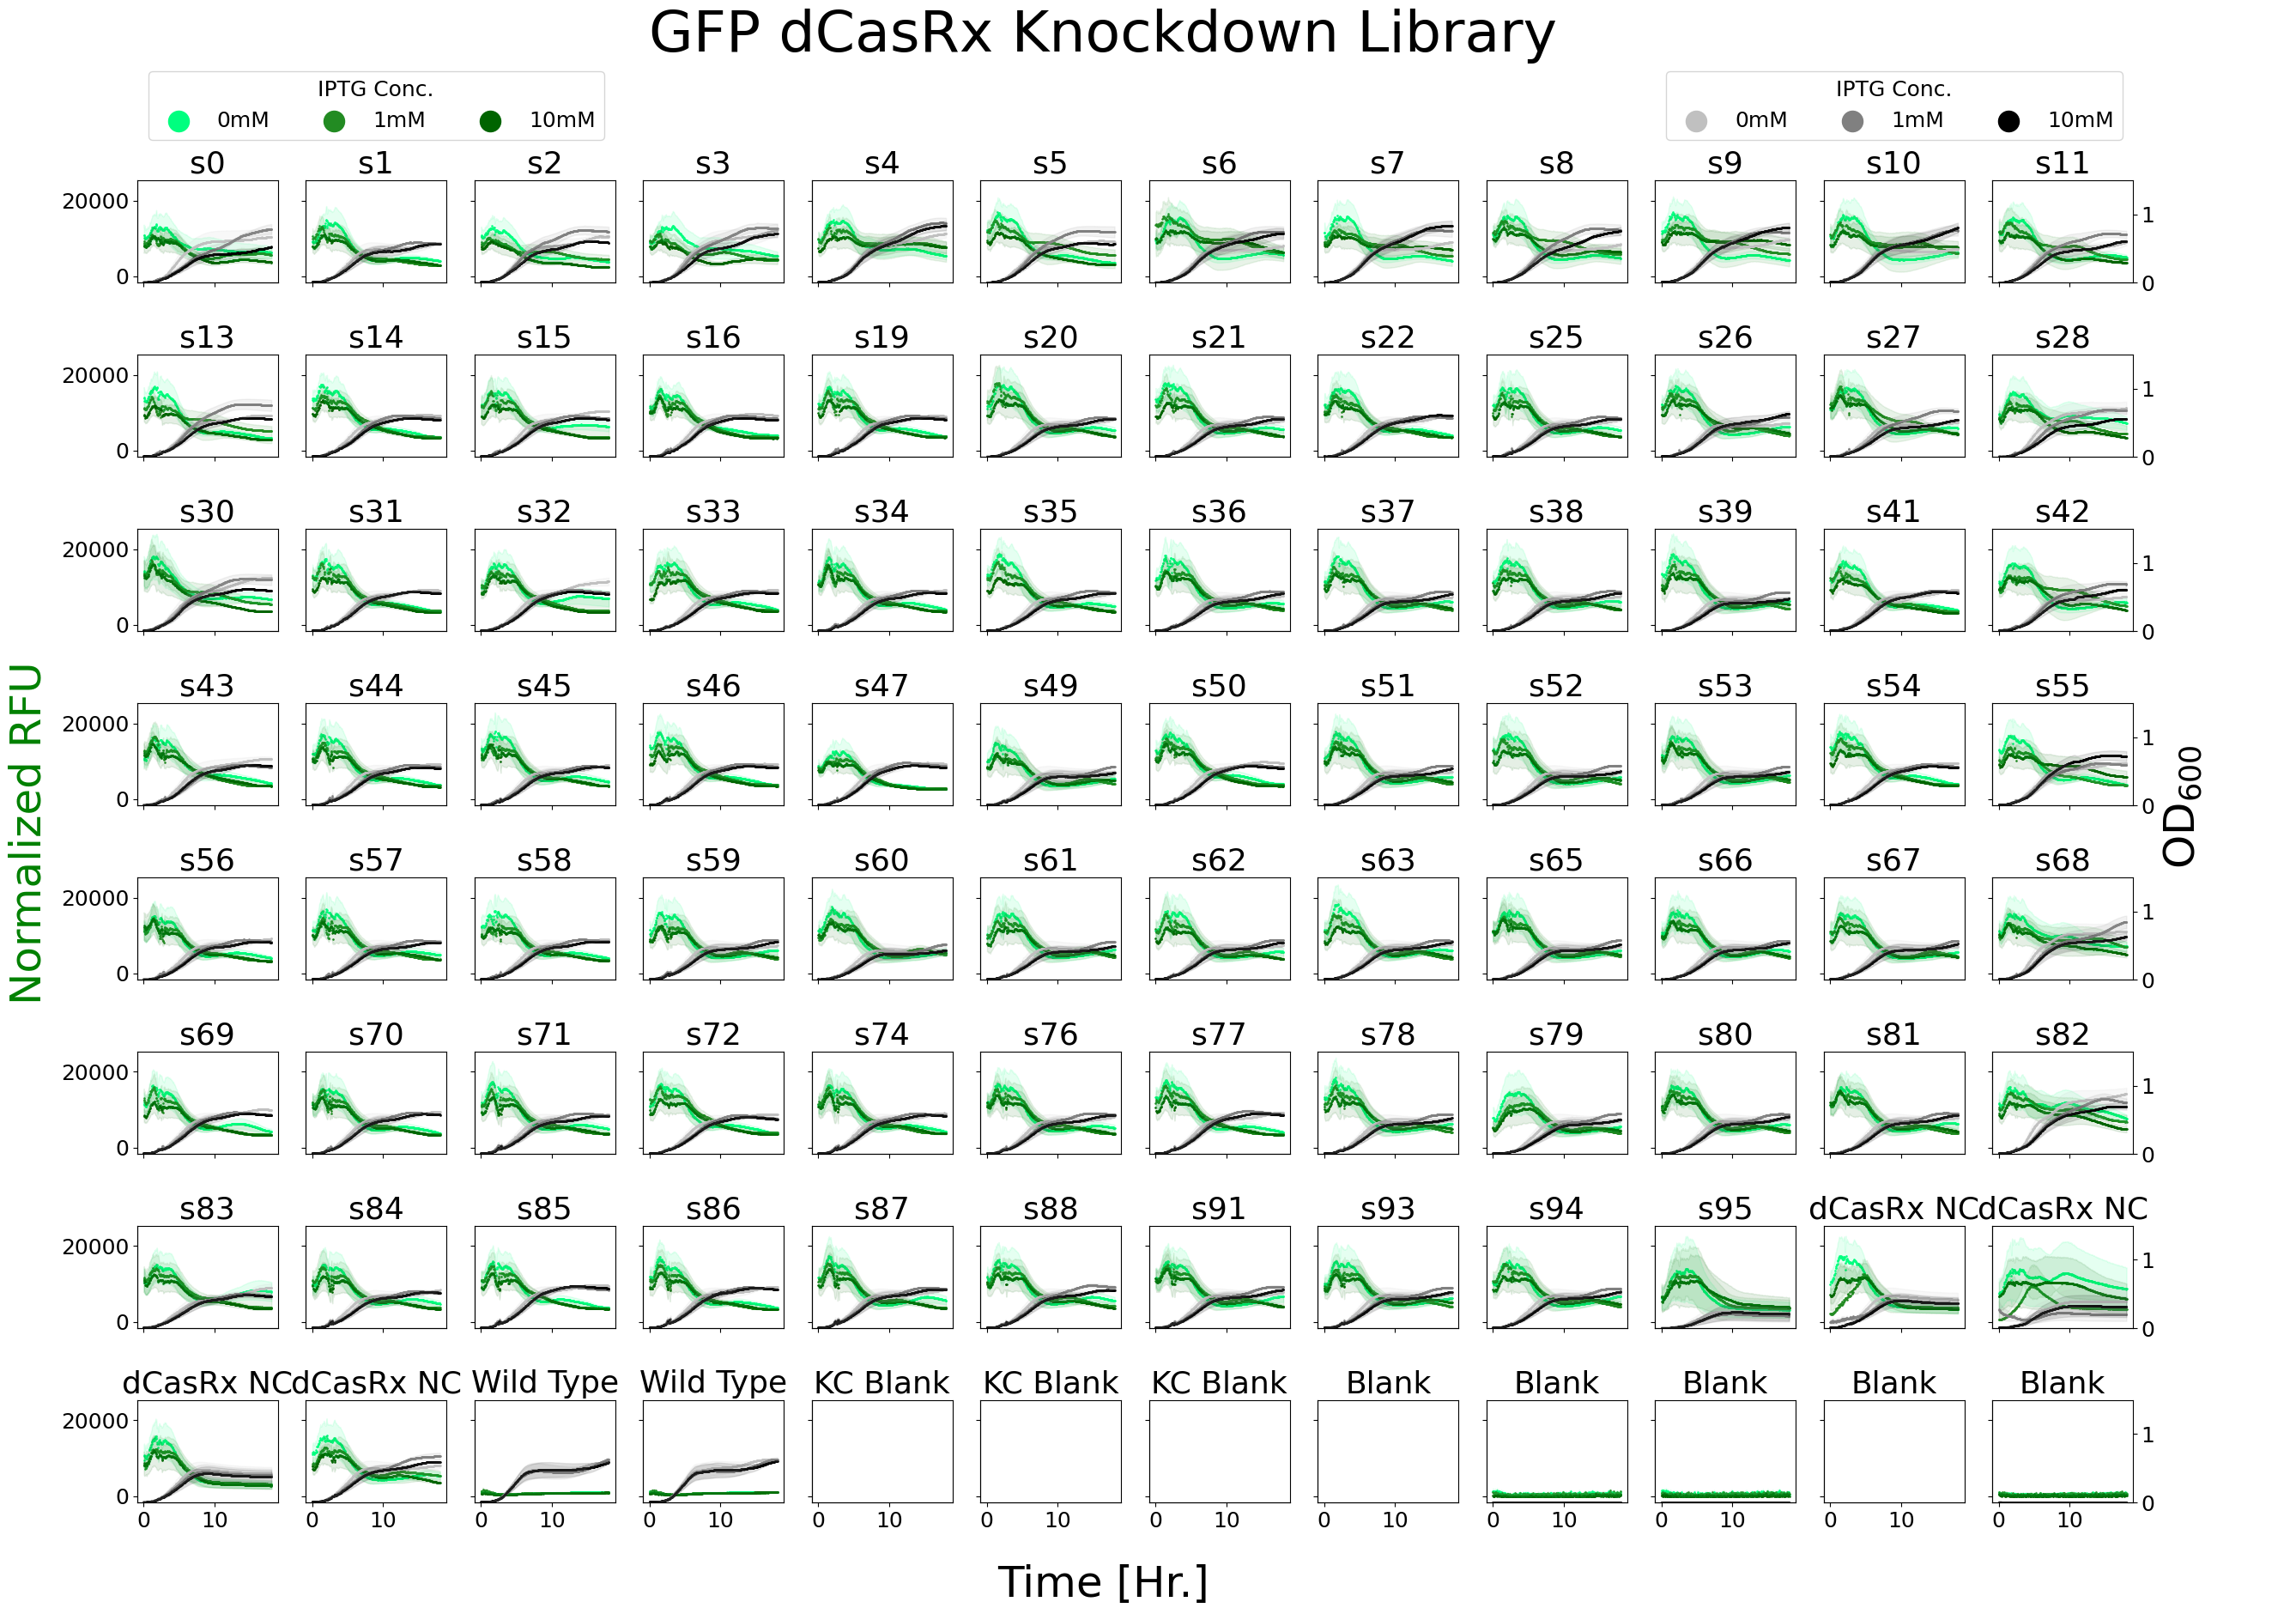

In [25]:
fig, axs = plt.subplots(8,12, sharey=True, sharex=True, figsize=(30,20), layout='tight')
face_size = 0.75
title_fsize = 48
subtitle_fsize = 26
label_fsize = 36
axis_fsize = 18
axs2_l = []
a = 0.1
Test = False

for i in range(8):
    for j in range(12):
        axs2 = axs[i,j].twinx()
        if not Test:
            axs2.set_ylim((0,1.5))
            axs2.yaxis.set_tick_params(labelsize=axis_fsize) 
            p21 = axs2.scatter(times_normalized['0mM']['600_Normalized'], norm_data_l['0mM']['600_Normalized'][i,j,:], s=face_size, color='silver')
            p22 = axs2.scatter(times_normalized['1mM']['600_Normalized'], norm_data_l['1mM']['600_Normalized'][i,j,:], s=face_size, color='gray')
            p23 = axs2.scatter(times_normalized['10mM']['600_Normalized'], norm_data_l['10mM']['600_Normalized'][i,j,:], s=face_size, color='Black')
            f21 = axs2.fill_between(times_normalized['0mM']['600_Normalized'], norm_data_l['0mM']['600_Normalized'][i,j,:]-norm_data_l['0mM']['600_Normalized_sem'][i,j,:], 
                                                      norm_data_l['0mM']['600_Normalized'][i,j,:]+norm_data_l['0mM']['600_Normalized_sem'][i,j,:], color='silver',alpha=a)
            f22 = axs2.fill_between(times_normalized['1mM']['600_Normalized'], norm_data_l['1mM']['600_Normalized'][i,j,:]-norm_data_l['1mM']['600_Normalized_sem'][i,j,:], 
                                                      norm_data_l['1mM']['600_Normalized'][i,j,:]+norm_data_l['1mM']['600_Normalized_sem'][i,j,:], color='gray',alpha=a)
            f22 = axs2.fill_between(times_normalized['10mM']['600_Normalized'], norm_data_l['10mM']['600_Normalized'][i,j,:]-norm_data_l['10mM']['600_Normalized_sem'][i,j,:], 
                                                      norm_data_l['10mM']['600_Normalized'][i,j,:]+norm_data_l['10mM']['600_Normalized_sem'][i,j,:], color='Black',alpha=a)            
            if j != 11:
                axs2.get_yaxis().set_ticks([])
            p1 = axs[i,j].scatter(times_normalized['0mM']['GFP_Normalized'], norm_data_l['0mM']['GFP_Normalized'][i,j,:], s=face_size, label='0mM', color='springgreen')
            p2 = axs[i,j].scatter(times_normalized['1mM']['GFP_Normalized'], norm_data_l['1mM']['GFP_Normalized'][i,j,:], s=face_size, label='1mM', color='forestgreen')
            p3 = axs[i,j].scatter(times_normalized['10mM']['GFP_Normalized'], norm_data_l['10mM']['GFP_Normalized'][i,j,:], s=face_size, label='10mM', color='darkgreen')
            f1 = axs[i,j].fill_between(times_normalized['0mM']['GFP_Normalized'], norm_data_l['0mM']['GFP_Normalized'][i,j,:]-norm_data_l['0mM']['GFP_Normalized_sem'][i,j,:], 
                                                      norm_data_l['0mM']['GFP_Normalized'][i,j,:]+norm_data_l['0mM']['GFP_Normalized_sem'][i,j,:], color='springgreen',alpha=a)           
            f2 = axs[i,j].fill_between(times_normalized['1mM']['GFP_Normalized'], norm_data_l['0mM']['GFP_Normalized'][i,j,:]-norm_data_l['1mM']['GFP_Normalized_sem'][i,j,:], 
                                                      norm_data_l['1mM']['GFP_Normalized'][i,j,:]+norm_data_l['1mM']['GFP_Normalized_sem'][i,j,:], color='forestgreen',alpha=a)
            f3 = axs[i,j].fill_between(times_normalized['10mM']['GFP_Normalized'], norm_data_l['10mM']['GFP_Normalized'][i,j,:]-norm_data_l['10mM']['GFP_Normalized_sem'][i,j,:], 
                                                      norm_data_l['10mM']['GFP_Normalized'][i,j,:]+norm_data_l['10mM']['GFP_Normalized_sem'][i,j,:], color='darkgreen',alpha=a) 
                    
        axs[i,j].set_title(titles[i][j], size=subtitle_fsize)
        
        axs[i,j].spines['right'].set_visible(False)
        axs[i,j].spines['top'].set_visible(False)
         
        axs[i,j].yaxis.set_tick_params(labelsize=axis_fsize)
        axs[i,j].xaxis.set_tick_params(labelsize=axis_fsize)  
        
        axs3 = copy.copy(axs2)

plt.subplots_adjust(hspace=0.7)
if Test:
    p1 = mpatches.Patch(color='red', label='The red data')
    p2 = mpatches.Patch(color='red', label='The red data')
    p3 = mpatches.Patch(color='red', label='The red data')
    p21 = mpatches.Patch(color='red', label='The red data')
    p22 = mpatches.Patch(color='red', label='The red data')
    p23 = mpatches.Patch(color='red', label='The red data')        
fig.suptitle('GFP dCasRx Knockdown Library', size=title_fsize)
fig.supxlabel('Time [Hr.]', size=label_fsize, y = 0.05)
fig.supylabel('Normalized RFU', size=label_fsize, x=0.075, color='Green')
secondylabel = plt.annotate('OD$_{600}$', xy=(0.96, 0.5), xycoords=fig, size=label_fsize, ha='right', va='center', rotation=90)
fig.legend([p1,p2,p3], ['0mM', '1mM', '10mM'], loc='outside upper left', bbox_to_anchor=(0.125,0.95), title='IPTG Conc.',fontsize=axis_fsize, title_fontsize=axis_fsize, markerscale=20, ncol=3)
fig.legend([p21,p22,p23], ['0mM', '1mM', '10mM'], loc='outside upper right', bbox_to_anchor=(0.90,0.95), title='IPTG Conc.',fontsize=axis_fsize, title_fontsize=axis_fsize, markerscale=20, ncol=3)
plt.show()

In [26]:
# Determine the area under the curve for the fluorescence.
AUC = {}
for i, (group, data) in enumerate(norm_data_l.items()):
    AUC[group] = {}
    for read in data:
        if '_sem' in read or '_std' in read:
            continue
        AUC[group][read] = np.trapz(data[read])
        AUC[group][read][7,4:8] = np.nan
        AUC[group][read][7,10] = np.nan

In [27]:
AUC['0mM'].keys()

dict_keys(['GFP_Normalized', '600_Normalized'])

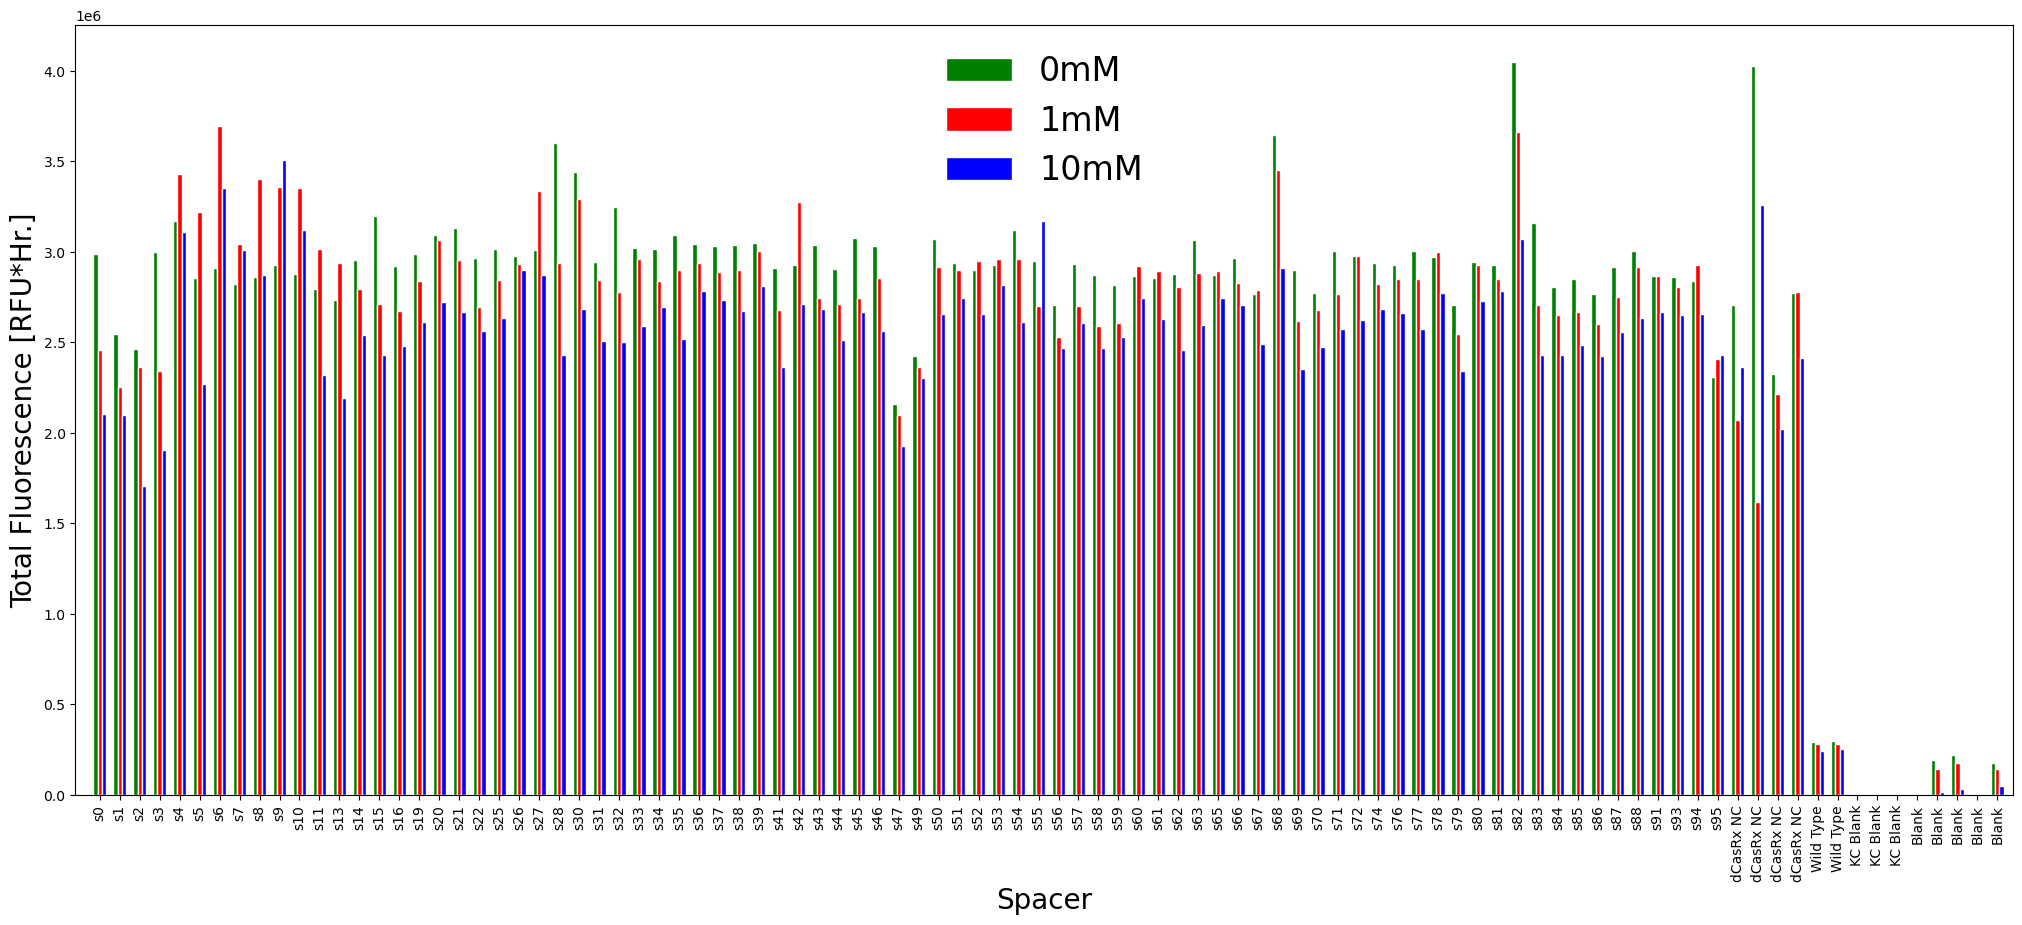

In [28]:
fig, ax = plt.subplots(figsize=(25,10))


margin = 2
 
# set heights of bars
bars1 = AUC['0mM']['GFP_Normalized'].reshape((96))
bars2 = AUC['1mM']['GFP_Normalized'].reshape((96))
bars3 = AUC['10mM']['GFP_Normalized'].reshape((96))

barWidth = (25-2*margin)/len(bars1) 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
ax.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='0mM')
ax.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='1mM')
ax.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='10mM')
 
# Add xticks on the middle of the group bars
ax.set_xlabel('Spacer', fontsize=20)
ax.set_ylabel('Total Fluorescence [RFU*Hr.]', fontsize=20)
ax.set_xticks([r + barWidth for r in range(len(bars1))], np.array(titles).reshape(96), rotation= 90, fontsize=10)
 
# Create legend & Show graphic
ax.legend(frameon=False, fontsize=24)
plt.xlim([-1,r1.size])
plt.show()

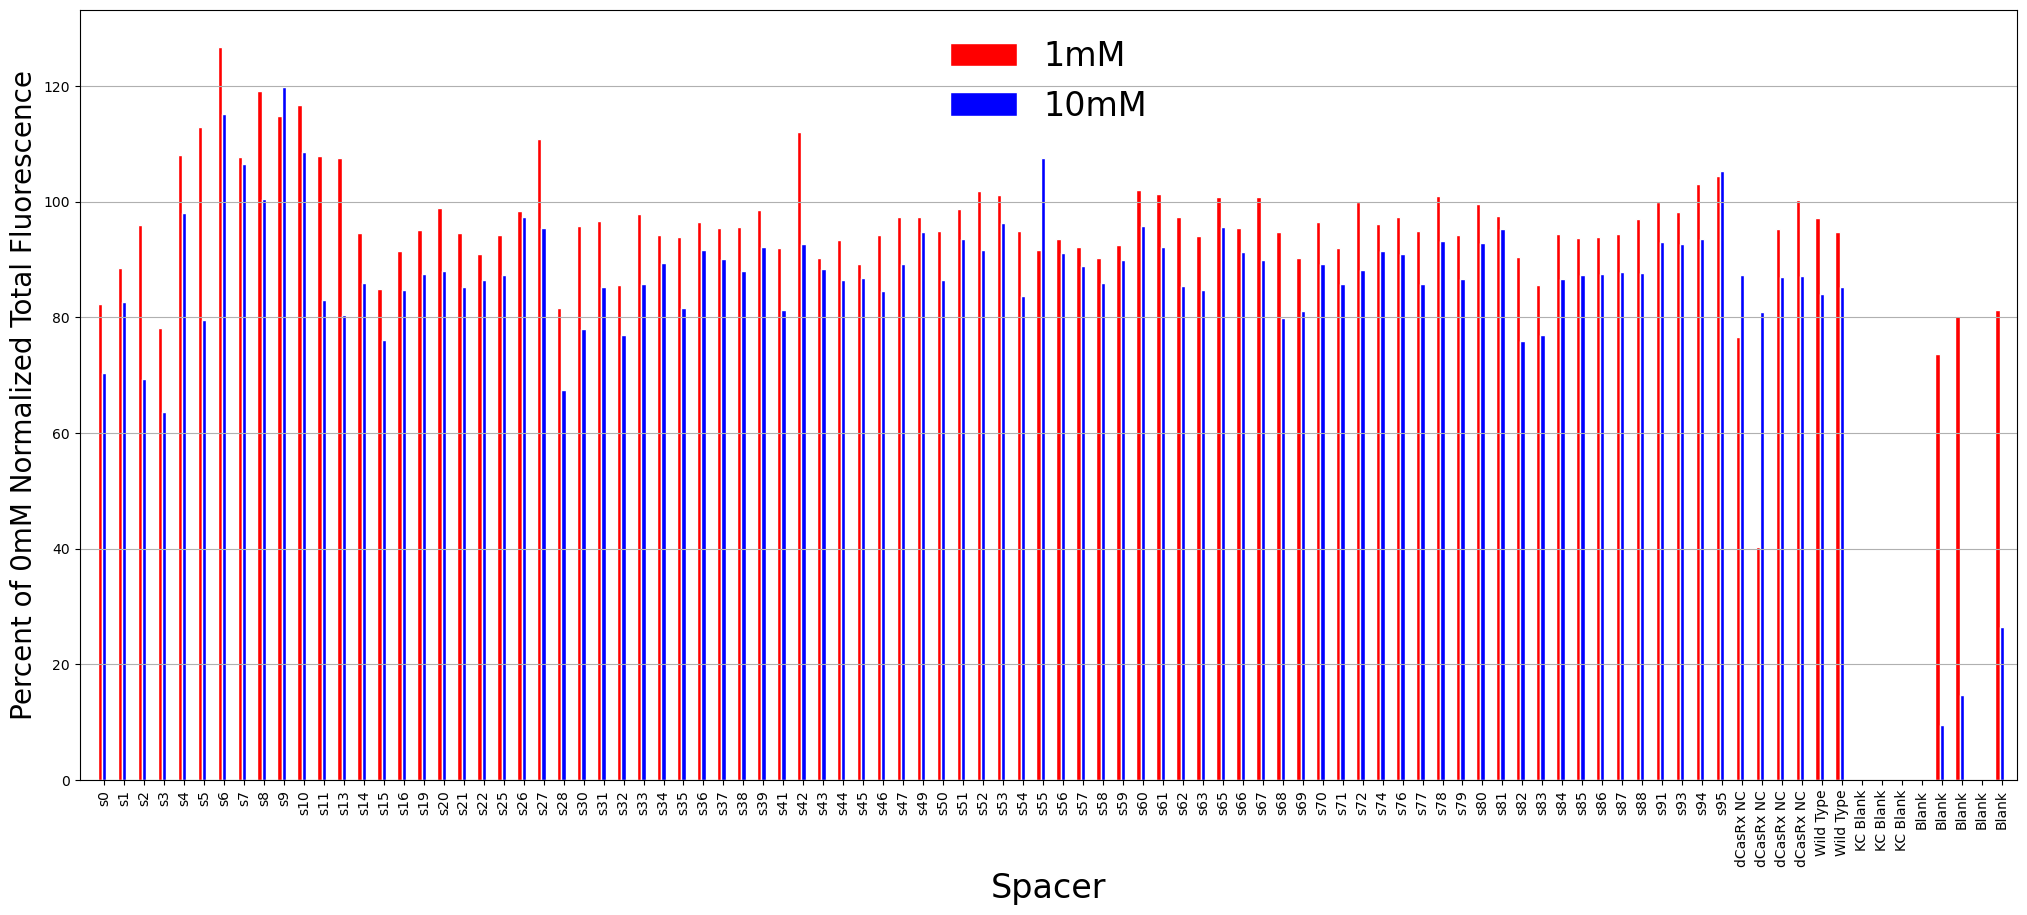

In [29]:
fig, ax = plt.subplots(figsize=(25,10))

margin = 2
AUC_percent = {}

AUC_percent = {'1mM': AUC['1mM']['GFP_Normalized'].reshape((96))/AUC['0mM']['GFP_Normalized'].reshape((96))*100, '10mM':AUC['10mM']['GFP_Normalized'].reshape((96))/AUC['0mM']['GFP_Normalized'].reshape((96))*100}
 
# set heights of bars
bars1 = AUC_percent['1mM']
bars2 = AUC_percent['10mM']

barWidth = (25-2*margin)/len(bars1) 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
ax.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='1mM')
ax.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='10mM')

 
# Add xticks on the middle of the group bars
ax.set_xlabel('Spacer', fontsize=24)
ax.set_ylabel('Percent of 0mM Normalized Total Fluorescence', fontsize=20)
ax.set_xticks([r + barWidth for r in range(len(bars1))], np.array(titles).reshape(96), rotation=90, fontsize=10)
ax.grid(axis='y')
 
# Create legend & Show graphic
ax.legend(frameon=False, fontsize=24)
plt.xlim([-1,r1.size])
plt.show()

In [30]:
AUC_percent['1mM'].shape

(96,)

In [44]:
#Try propegation of error:

AUC_error = {}
AUC_percent_error = {}
for conc, data in norm_data_l.items():
    AUC_error[conc] = {}
    AUC_percent_error[conc] = {}
    for read in ['GFP_Normalized','600_Normalized']:
        AUC_error[conc][read] = np.zeros((1,96))

        for i in range(data[read].shape[0]):
            for j in range(data[read].shape[1]):
                error = 0
                for k in range(data[read].shape[2]-1):
                    
                    dx = data[read][i,j,k]+data[read][i,j,k+1]
                    dt = times_normalized[conc][read][k+1]-times_normalized[conc][read][k]
                    dt_err = np.sqrt(np.square(times_normalized[conc][read+'_std'][k+1])+np.square(times_normalized[conc][read+'_std'][k]))
                    if data[read][i,j,k] == np.nan or data[read+'_std'][i,j,k] == np.nan:
                        error = np.nan
                    elif data[read][i,j,k] == 0 or data[read+'_std'][i,j,k] == 0:
                        continue
                    else:
                        error += np.square(dx*dt*np.sqrt(np.square(np.sqrt(np.square(data[read+'_std'][i,j,k]/data[read][i,j,k])+np.square(data[read+'_std'][i,j,k]/data[read][i,j,k]))+(np.square(dt_err/dt)))))
                AUC_error[conc][read][0,i*data[read].shape[1]+j] = np.sqrt(error)
    if conc == '0mM':
        continue
    AUC_percent_error[conc] = np.sqrt(np.square(AUC_error[conc]['GFP_Normalized']/AUC[conc]['GFP_Normalized'].reshape(96))+np.square(AUC_error[conc]['600_Normalized']/AUC[conc]['600_Normalized'].reshape(96)))*100
                    

/var/folders/26/rtsmjr3x2_n6cc610wmpyt_m0000gn/T/ipykernel_89234/365420140.py:28: RuntimeWarning: invalid value encountered in divide
  AUC_percent_error[conc] = np.sqrt(np.square(AUC_error[conc]['GFP_Normalized']/AUC[conc]['GFP_Normalized'].reshape(96))+np.square(AUC_error[conc]['600_Normalized']/AUC[conc]['600_Normalized'].reshape(96)))*100


In [47]:
AUC_percent_error['1mM'].reshape(96)[-1] = np.nan
AUC_percent_error['10mM'].reshape(96)[-1] = np.nan 

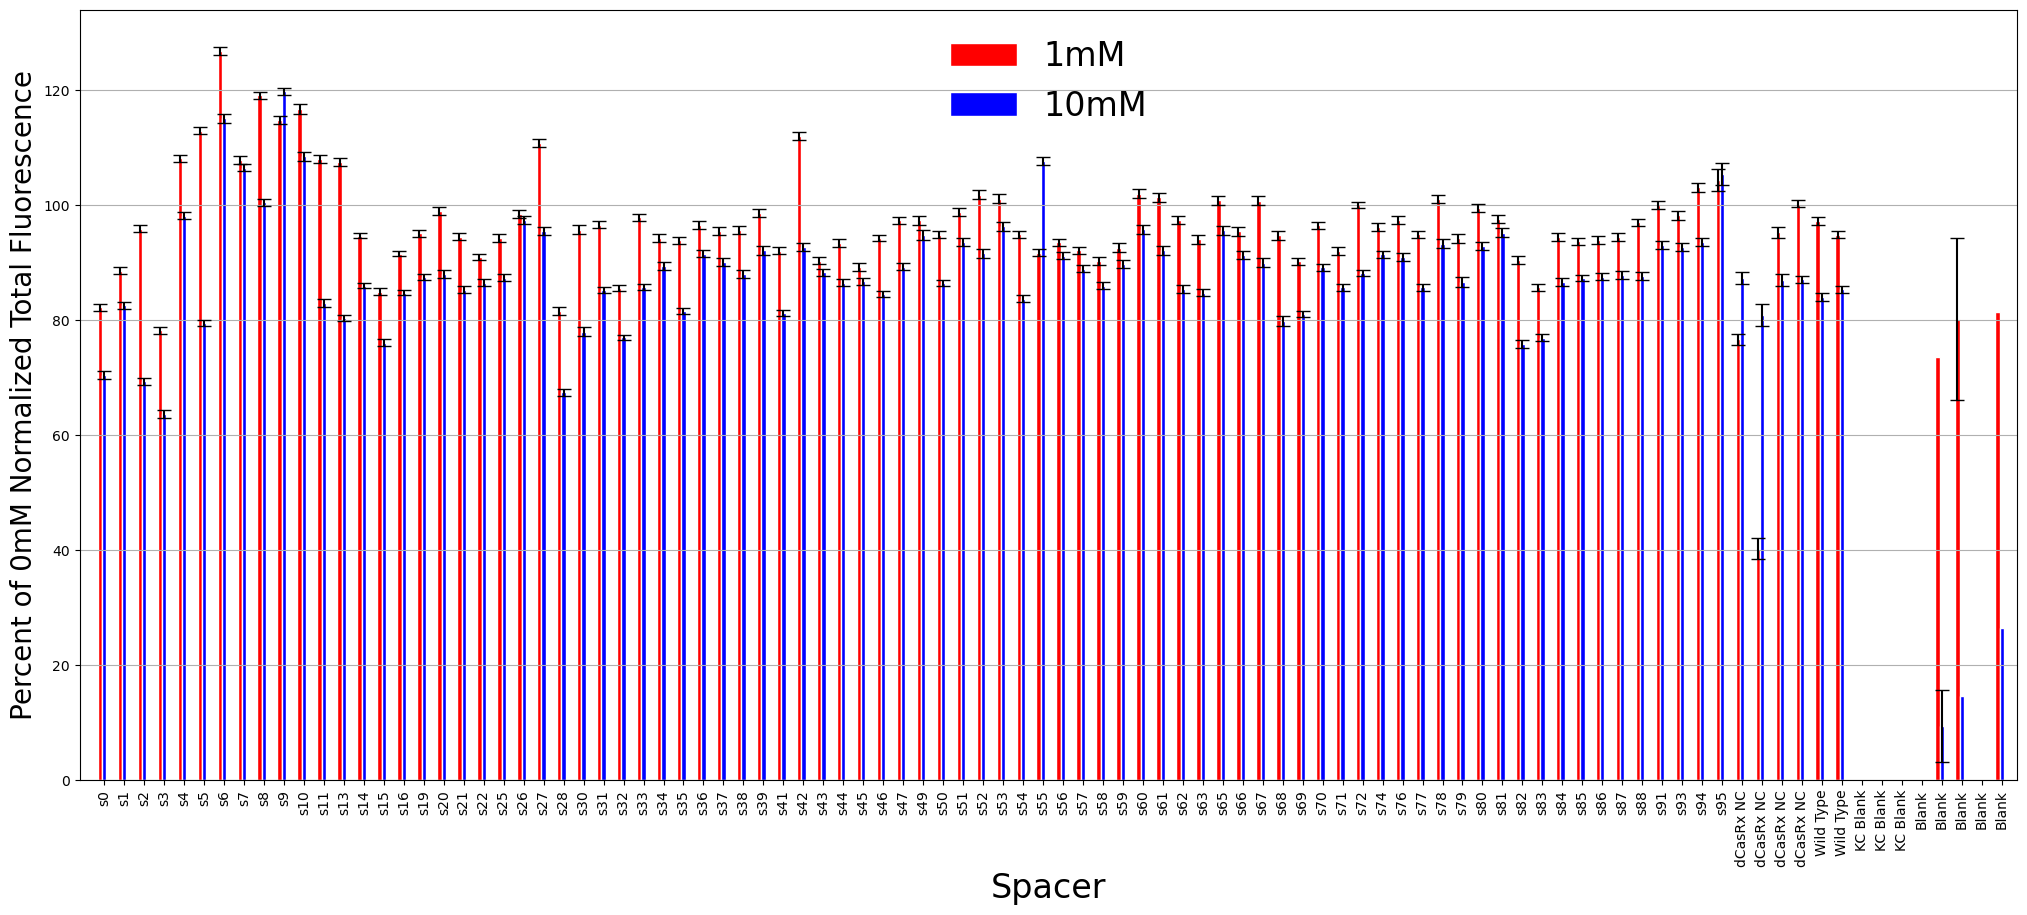

In [48]:
fig, ax = plt.subplots(figsize=(25,10))
 
# set heights of bars
bars1 = AUC_percent['1mM']
bars2 = AUC_percent['10mM']

barWidth = (25-2*margin)/len(bars1) 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
ax.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='1mM', yerr=AUC_percent_error['1mM'].reshape(96), capsize=5)
ax.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='10mM', yerr=AUC_percent_error['10mM'].reshape(96), capsize=5)

 
# Add xticks on the middle of the group bars
ax.set_xlabel('Spacer', fontsize=24)
ax.set_ylabel('Percent of 0mM Normalized Total Fluorescence', fontsize=20)
ax.set_xticks([r + barWidth for r in range(len(bars1))], np.array(titles).reshape(96), rotation=90, fontsize=10)
ax.grid(axis='y')
 
# Create legend & Show graphic
ax.legend(frameon=False, fontsize=24)
plt.xlim([-1,r1.size])
plt.show()

In [34]:
PerChange_df = pd.DataFrame(columns=['PC1mM', 'PC10mM'])

PerChange_df['PC1mM'] = bars1
PerChange_df['PC10mM'] = bars2
PerChange_df.index = np.array(titles).reshape(96)

In [35]:
PerChange_df = PerChange_df.drop(['Blank', 'dCasRx NC'])

In [36]:
High1mM = PerChange_df['PC1mM'].nlargest(n=5).index.to_list()
High1mM

['s6', 's8', 's10', 's9', 's5']

In [37]:
Low1mM = PerChange_df['PC1mM'].nsmallest(n=5).index.to_list()
Low1mM

['s3', 's28', 's0', 's15', 's32']

In [38]:
High10mM = PerChange_df['PC10mM'].nlargest(n=5).index.to_list()
High10mM

['s9', 's6', 's10', 's55', 's7']

In [39]:
Low10mM = PerChange_df['PC10mM'].nsmallest(n=5).index.to_list()
Low10mM

['s3', 's28', 's2', 's0', 's82']

/usr/local/anaconda3/envs/p2x11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


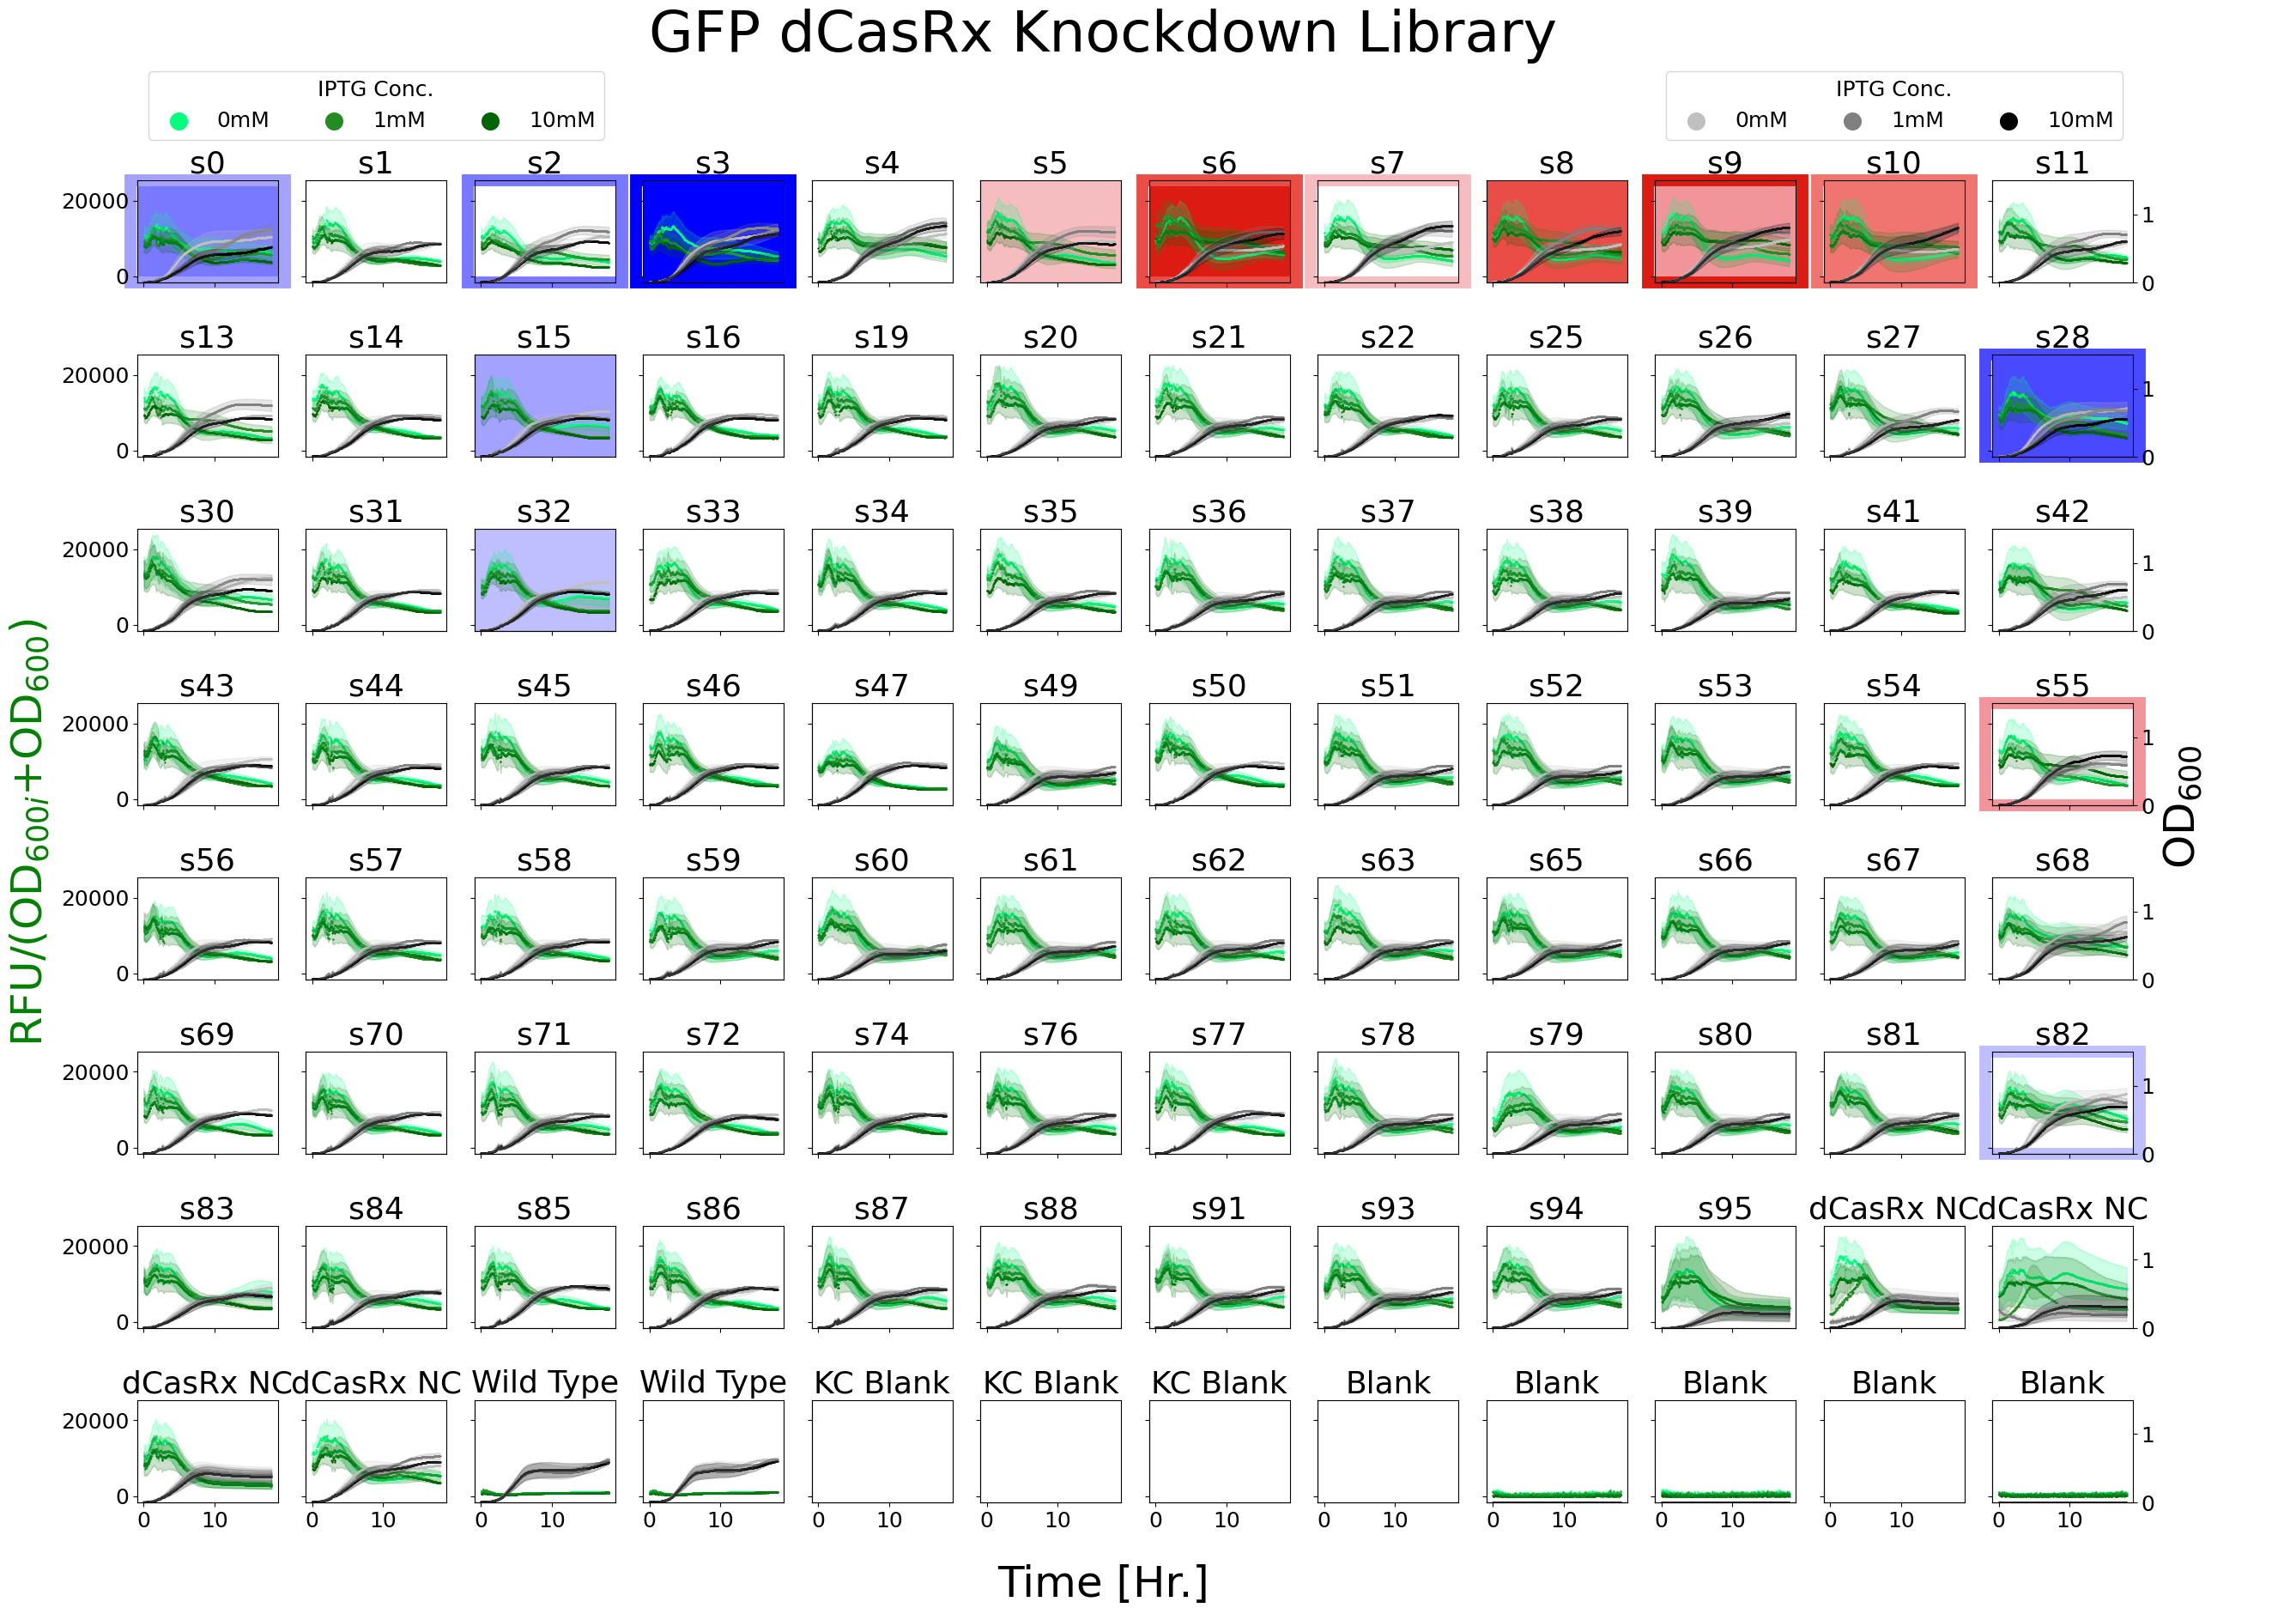

In [41]:
fig, axs = plt.subplots(8,12, sharey=True, sharex=True, figsize=(30,20), layout='tight')
face_size = 0.5
title_fsize = 48
subtitle_fsize = 26
label_fsize = 36
axis_fsize = 18
axs2_l = []
a = 0.2
Test = False

for i in range(8):
    for j in range(12):
        axs2 = axs[i,j].twinx()
        if not Test:
            axs2.set_ylim((0,1.5))
            axs2.yaxis.set_tick_params(labelsize=axis_fsize) 
            p21 = axs2.scatter(times_normalized['0mM']['600_Normalized'], norm_data_l['0mM']['600_Normalized'][i,j,:], s=face_size, color='silver')
            p22 = axs2.scatter(times_normalized['1mM']['600_Normalized'], norm_data_l['1mM']['600_Normalized'][i,j,:], s=face_size, color='gray')
            p23 = axs2.scatter(times_normalized['10mM']['600_Normalized'], norm_data_l['10mM']['600_Normalized'][i,j,:], s=face_size, color='Black')
            f21 = axs2.fill_between(times_normalized['0mM']['600_Normalized'], norm_data_l['0mM']['600_Normalized'][i,j,:]-norm_data_l['0mM']['600_Normalized_sem'][i,j,:], 
                                                      norm_data_l['0mM']['600_Normalized'][i,j,:]+norm_data_l['0mM']['600_Normalized_sem'][i,j,:], color='silver',alpha=a)
            f22 = axs2.fill_between(times_normalized['1mM']['600_Normalized'], norm_data_l['1mM']['600_Normalized'][i,j,:]-norm_data_l['1mM']['600_Normalized_sem'][i,j,:], 
                                                      norm_data_l['1mM']['600_Normalized'][i,j,:]+norm_data_l['1mM']['600_Normalized_sem'][i,j,:], color='gray',alpha=a)
            f22 = axs2.fill_between(times_normalized['10mM']['600_Normalized'], norm_data_l['10mM']['600_Normalized'][i,j,:]-norm_data_l['10mM']['600_Normalized_sem'][i,j,:], 
                                                      norm_data_l['10mM']['600_Normalized'][i,j,:]+norm_data_l['10mM']['600_Normalized_sem'][i,j,:], color='Black',alpha=a)            
            if j != 11:
                axs2.get_yaxis().set_ticks([])
            p1 = axs[i,j].scatter(times_normalized['0mM']['GFP_Normalized'], norm_data_l['0mM']['GFP_Normalized'][i,j,:], s=face_size, label='0mM', color='springgreen')
            p2 = axs[i,j].scatter(times_normalized['1mM']['GFP_Normalized'], norm_data_l['1mM']['GFP_Normalized'][i,j,:], s=face_size, label='1mM', color='forestgreen')
            p3 = axs[i,j].scatter(times_normalized['10mM']['GFP_Normalized'], norm_data_l['10mM']['GFP_Normalized'][i,j,:], s=face_size, label='10mM', color='darkgreen')
            f1 = axs[i,j].fill_between(times_normalized['0mM']['GFP_Normalized'], norm_data_l['0mM']['GFP_Normalized'][i,j,:]-norm_data_l['0mM']['GFP_Normalized_sem'][i,j,:], 
                                                      norm_data_l['0mM']['GFP_Normalized'][i,j,:]+norm_data_l['0mM']['GFP_Normalized_sem'][i,j,:], color='springgreen',alpha=a)           
            f2 = axs[i,j].fill_between(times_normalized['1mM']['GFP_Normalized'], norm_data_l['0mM']['GFP_Normalized'][i,j,:]-norm_data_l['1mM']['GFP_Normalized_sem'][i,j,:], 
                                                      norm_data_l['1mM']['GFP_Normalized'][i,j,:]+norm_data_l['1mM']['GFP_Normalized_sem'][i,j,:], color='forestgreen',alpha=a)
            f3 = axs[i,j].fill_between(times_normalized['10mM']['GFP_Normalized'], norm_data_l['10mM']['GFP_Normalized'][i,j,:]-norm_data_l['10mM']['GFP_Normalized_sem'][i,j,:], 
                                                      norm_data_l['10mM']['GFP_Normalized'][i,j,:]+norm_data_l['10mM']['GFP_Normalized_sem'][i,j,:], color='darkgreen',alpha=a) 
                    
        axs[i,j].set_title(titles[i][j], size=subtitle_fsize)
        
        axs[i,j].spines['right'].set_visible(False)
        axs[i,j].spines['top'].set_visible(False)
         
        axs[i,j].yaxis.set_tick_params(labelsize=axis_fsize)
        axs[i,j].xaxis.set_tick_params(labelsize=axis_fsize)  
        
        axs3 = copy.copy(axs2)
        
title_arr = np.array(titles)

# Find the indices of the elements in the array
indH1mM = [(np.where(title_arr == element)[0][0],np.where(title_arr == element)[1][0])  for element in High1mM]
indH10mM = [(np.where(title_arr == element)[0][0],np.where(title_arr == element)[1][0])  for element in High10mM]
indL1mM = [(np.where(title_arr == element)[0][0],np.where(title_arr == element)[1][0])  for element in Low1mM]
indL10mM = [(np.where(title_arr == element)[0][0],np.where(title_arr == element)[1][0])  for element in Low10mM]

high_colors = ['#DC1C13', '#EA4C46', '#F07470', '#F1959B', '#F6BDC0']
low_colors = ['#0000FF', '#4949FF', '#7879FF', '#A3A3FF', '#BFBFFF']

for i in range(5):
    axs[indH1mM[i][0], indH1mM[i][1]].set_facecolor(high_colors[i])
    axs[indL1mM[i][0], indL1mM[i][1]].set_facecolor(low_colors[i])
    
a=1
for i in range(5):
    axH = axs[indH10mM[i][0], indH10mM[i][1]].axis()
    axL = axs[indL10mM[i][0], indL10mM[i][1]].axis()
    recH = plt.Rectangle((axH[0]-a, axH[2]-a), (axH[1]-axH[0])+2*a, (axH[3]-axH[2])+2*a, edgecolor=high_colors[i], fill=False, lw=10, linestyle='-')
    recL = plt.Rectangle((axL[0]-a, axL[2]-a), (axL[1]-axL[0])+2*a, (axL[3]-axL[2])+2*a, edgecolor=low_colors[i], fill=False, lw=10, linestyle='-')
    recH = axs[indH10mM[i][0], indH10mM[i][1]].add_patch(recH)
    recL = axs[indL10mM[i][0], indL10mM[i][1]].add_patch(recL)
    recH.set_clip_on(False)
    recL.set_clip_on(False)
    
plt.subplots_adjust(hspace=0.7)

if Test:
    p1 = mpatches.Patch(color='red', label='The red data')
    p2 = mpatches.Patch(color='red', label='The red data')
    p3 = mpatches.Patch(color='red', label='The red data')
    p21 = mpatches.Patch(color='red', label='The red data')
    p22 = mpatches.Patch(color='red', label='The red data')
    p23 = mpatches.Patch(color='red', label='The red data') 
           
fig.suptitle('GFP dCasRx Knockdown Library', size=title_fsize)
fig.supxlabel('Time [Hr.]', size=label_fsize, y = 0.05)
fig.supylabel('RFU/(OD$_{600i}$+OD$_{600}}$)', size=label_fsize, x=0.075, color='Green')
secondylabel = plt.annotate('OD$_{600}$', xy=(0.96, 0.5), xycoords=fig, size=label_fsize, ha='right', va='center', rotation=90)
fig.legend([p1,p2,p3], ['0mM', '1mM', '10mM'], loc='outside upper left', bbox_to_anchor=(0.125,0.95), title='IPTG Conc.',fontsize=axis_fsize, title_fontsize=axis_fsize, markerscale=20, ncol=3)
fig.legend([p21,p22,p23], ['0mM', '1mM', '10mM'], loc='outside upper right', bbox_to_anchor=(0.90,0.95), title='IPTG Conc.',fontsize=axis_fsize, title_fontsize=axis_fsize, markerscale=20, ncol=3)
plt.show()

In [ ]:
# With advise from Brian lets try to calculate the area under the curve of each well and then calculate the statistics 